In [ ]:
# Import necessary libraries
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from google.colab import drive
import matplotlib.pyplot as plt



In [ ]:

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

# Set up paths
base_path = '/content/drive/MyDrive/DATASET'
train_path = os.path.join(base_path, 'TRAIN')
test_path = os.path.join(base_path, 'TEST')


In [ ]:

# Define OpenPose model
def create_openpose_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [ ]:


# Preprocess images
def preprocess_image(img_path, target_size=(224, 224)):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, target_size)
    return img / 255.0


In [ ]:

# Load and preprocess data
def load_data(data_path):
    images = []
    labels = []
    classes = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']

    for class_name in classes:
        class_path = os.path.join(data_path, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = preprocess_image(img_path)
            images.append(img)
            labels.append(classes.index(class_name))

    return np.array(images), np.array(labels)

In [ ]:

# Load training and testing data
X_train, y_train = load_data(train_path)
X_test, y_test = load_data(test_path)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [ ]:

# Create data generators
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = ImageDataGenerator().flow(X_val, y_val, batch_size=32)


In [ ]:

# Create and compile the model
input_shape = (224, 224, 3)
num_classes = 5
model = create_openpose_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:


# Train the model
epochs = 50
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=len(X_val) // 32
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 185s 7s/step - accuracy: 0.2438 - loss: 1.6719 - val_accuracy: 0.2500 - val_loss: 1.5993
Epoch 2/50


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2800 - val_loss: 1.5893
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 198s 7s/step - accuracy: 0.2614 - loss: 1.6048 - val_accuracy: 0.2552 - val_loss: 1.5703
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2400 - val_loss: 1.6255
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 200s 7s/step - accuracy: 0.2312 - loss: 1.5993 - val_accuracy: 0.2865 - val_loss: 1.5555
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4000 - val_loss: 1.5350
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 200s 7s/step - accuracy: 0.2720 - loss: 1.5868 - val_accuracy: 0.3021 - val_loss: 1.5421
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2400 - val_loss: 1.5901
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 180s 7s/step - accuracy: 0.2916 - loss: 1.5804 - val

In [ ]:

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.9055 - loss: 0.3390
Test accuracy: 0.8936


In [ ]:

# Save the model
model.save('/content/drive/MyDrive/yoga_pose_model.h5')


In [ ]:

# Function to predict and visualize a single image
def categorize_and_visualize_pose(img_path):
    # Load the saved model
    model = load_model('/content/drive/MyDrive/yoga_pose_model.h5')

    # Preprocess the image
    img = preprocess_image(img_path)
    img_display = cv2.imread(img_path)
    img_display = cv2.cvtColor(img_display, cv2.COLOR_BGR2RGB)

    # Make prediction
    prediction = model.predict(np.expand_dims(img, axis=0))
    classes = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
    predicted_class = classes[np.argmax(prediction)]
    confidence = np.max(prediction) * 100

    # Visualize the result
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img_display)
    plt.title('Input Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.bar(classes, prediction[0])
    plt.title('Prediction Probabilities')
    plt.ylabel('Probability')
    plt.ylim(0, 1)

    plt.suptitle(f'Predicted Pose: {predicted_class} (Confidence: {confidence:.2f}%)')
    plt.tight_layout()
    plt.show()

    return predicted_class, confidence

# Example usage of the categorization function
# test_img_path = '/content/drive/MyDrive/DATASET/TEST/warrior2/00000004.jpg'
# predicted_pose, confidence = categorize_and_visualize_pose(test_img_path)
# print(f"Predicted pose: {predicted_pose} with confidence: {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


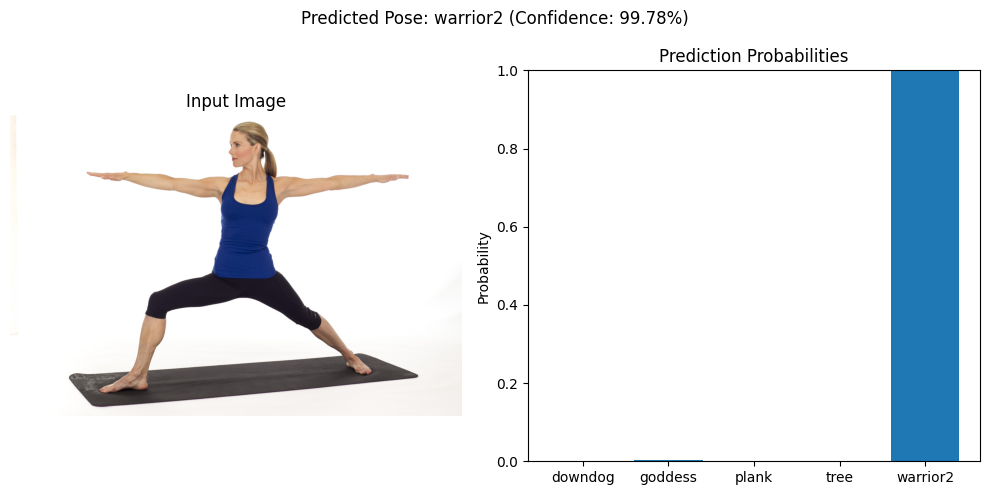

Predicted pose: warrior2 with confidence: 99.78%


In [ ]:
# Replace this path with the actual path to your image
test_img_path = '/content/drive/MyDrive/DATASET/TEST/warrior2/00000004.jpg'

# Call the function
predicted_pose, confidence = categorize_and_visualize_pose(test_img_path)

# Print the results
print(f"Predicted pose: {predicted_pose} with confidence: {confidence:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


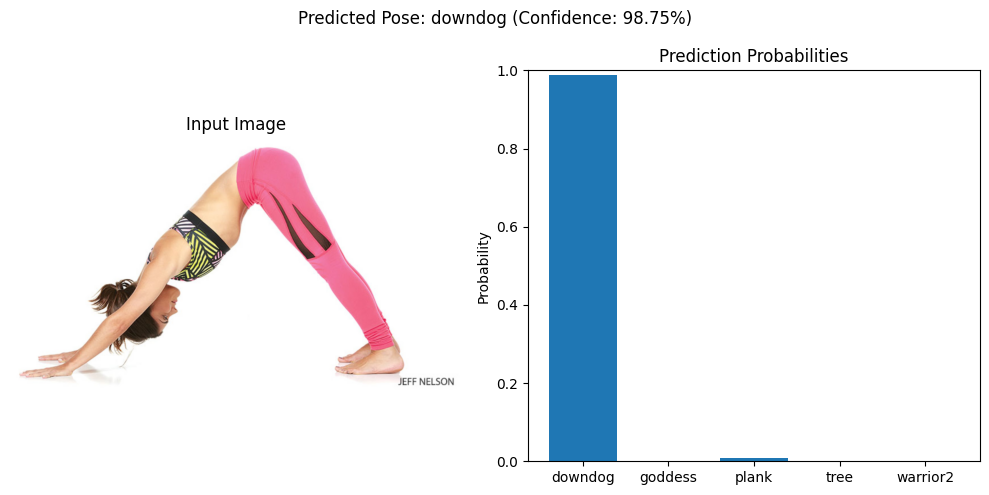

Predicted pose: downdog with confidence: 98.75%


In [ ]:
# Replace this path with the actual path to your image
test_img_path = '/content/drive/MyDrive/DATASET/TEST/downdog/00000004.jpg'

# Call the function
predicted_pose, confidence = categorize_and_visualize_pose(test_img_path)

# Print the results
print(f"Predicted pose: {predicted_pose} with confidence: {confidence:.2f}%")

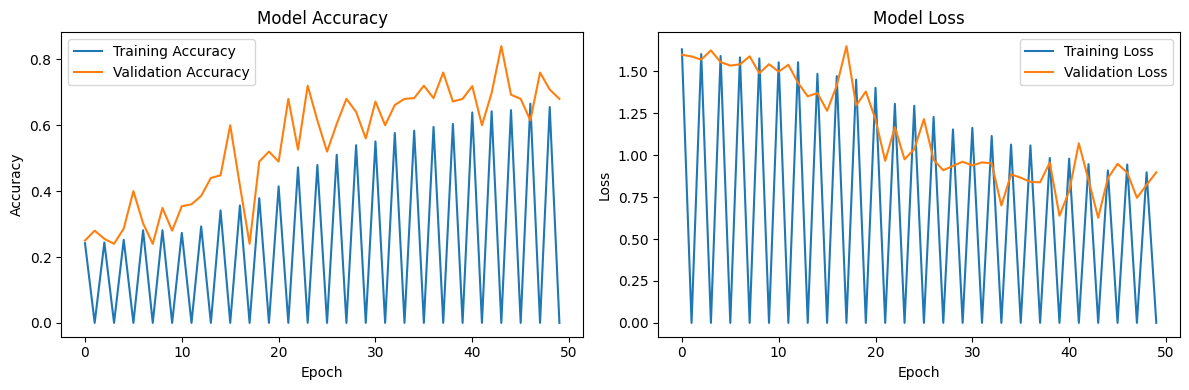

15/15 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step
Classification Report:
              precision    recall  f1-score   support

     downdog       0.97      0.95      0.96        97
     goddess       0.74      0.76      0.75        80
       plank       0.94      0.97      0.95       115
        tree       0.95      0.88      0.92        69
    warrior2       0.86      0.87      0.86       109

    accuracy                           0.89       470
   macro avg       0.89      0.89      0.89       470
weighted avg       0.90      0.89      0.89       470



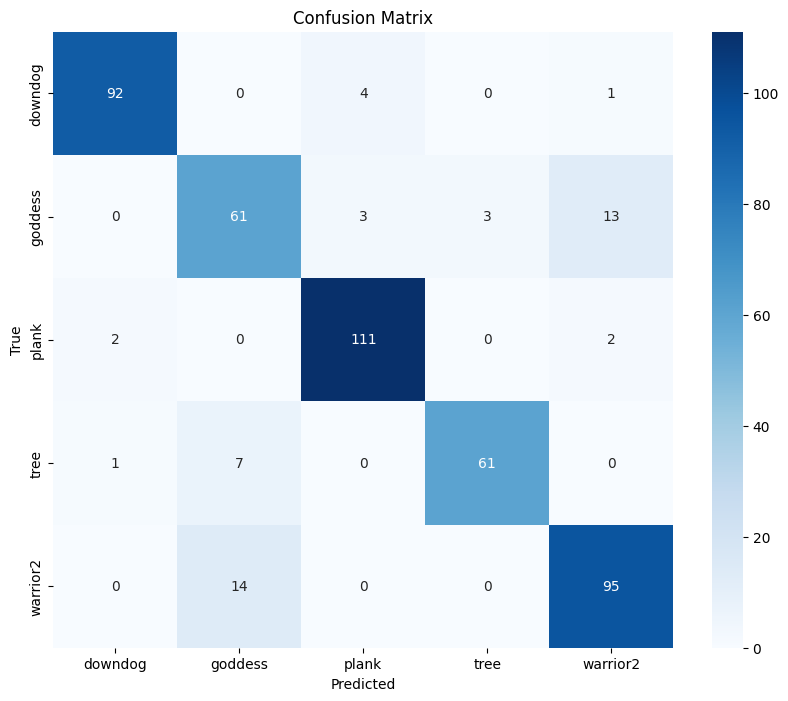

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# ... [Previous code for model definition, data loading, and training remains the same] ...

# After training the model, add these visualization functions:

def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def evaluate_model_performance(model, X_test, y_test):
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Get classification report
    classes = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
    report = classification_report(y_test, y_pred_classes, target_names=classes)
    print("Classification Report:")
    print(report)

    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred_classes, classes)

# After training the model, call these functions:
plot_training_history(history)

# Evaluate model performance
evaluate_model_performance(model, X_test, y_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step


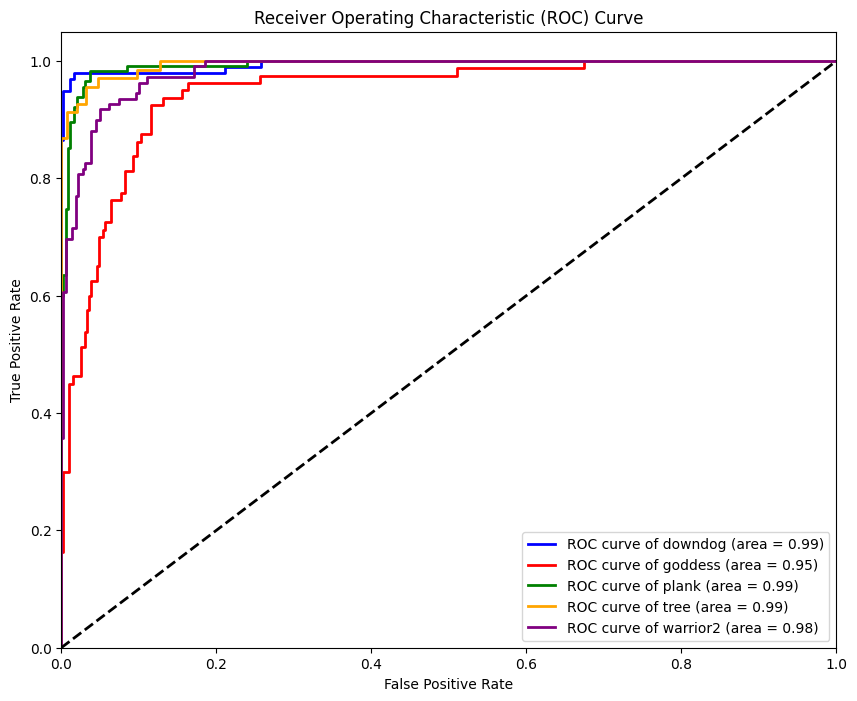

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

def plot_roc_curve(model, X_test, y_test):
    # Get the number of classes
    n_classes = len(np.unique(y_test))

    # Binarize the labels for one-vs-rest ROC
    y_test_bin = label_binarize(y_test, classes=range(n_classes))

    # Get predictions
    y_score = model.predict(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    plt.figure(figsize=(10, 8))
    colors = ['blue', 'red', 'green', 'orange', 'purple']
    classes = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']

    for i, color, cls in zip(range(n_classes), colors, classes):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of {cls} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# To use this function, add the following line after training and evaluating your model:
plot_roc_curve(model, X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


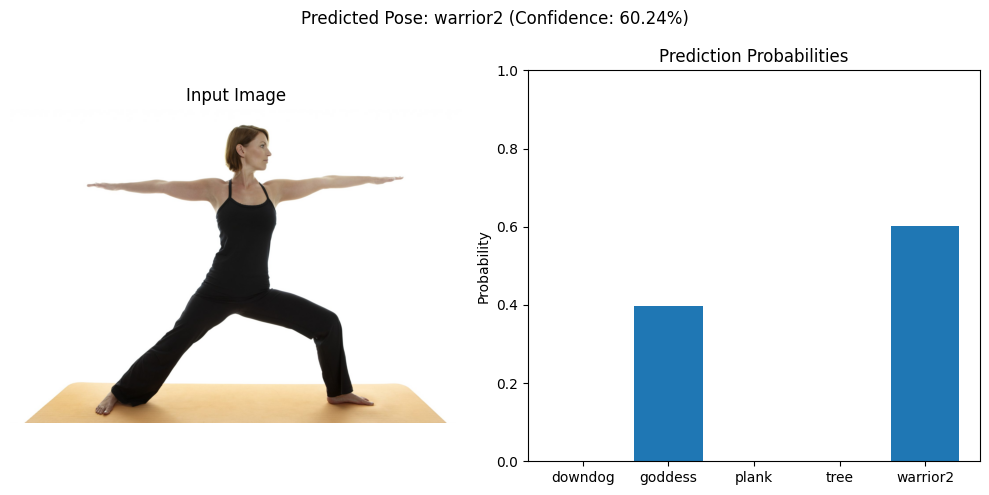

Predicted pose: warrior2 with confidence: 60.24%


In [ ]:
# Replace this path with the actual path to your image
test_img_path = '/content/drive/MyDrive/DATASET/TEST/warrior2/00000005.jpg'

# Call the function
predicted_pose, confidence = categorize_and_visualize_pose(test_img_path)

# Print the results
print(f"Predicted pose: {predicted_pose} with confidence: {confidence:.2f}%")

In [ ]:
import time
from sklearn.metrics import average_precision_score, accuracy_score
import numpy as np

def evaluate_openpose_model(model, X_test, y_test):
    # Start timing
    start_time = time.time()

    # Make predictions
    y_pred = model.predict(X_test)

    # End timing
    end_time = time.time()

    # Calculate time taken
    time_taken = end_time - start_time

    # Calculate accuracy
    y_pred_classes = np.argmax(y_pred, axis=1)
    accuracy = accuracy_score(y_test, y_pred_classes)

    # Calculate average precision
    # Convert y_test to one-hot encoding
    y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=5)
    average_precision = average_precision_score(y_test_one_hot, y_pred, average='macro')

    # Print results
    print(f"Evaluation Results:")
    print(f"Time taken: {time_taken:.2f} seconds")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Average Precision: {average_precision:.4f}")

    return time_taken, accuracy, average_precision

# After training the model, use this function to evaluate it:
time_taken, accuracy, avg_precision = evaluate_openpose_model(model, X_test, y_test)

15/15 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step
Evaluation Results:
Time taken: 41.49 seconds
Accuracy: 0.8936
Average Precision: 0.9385
